This machine learning project aims to detect spam sms

This project has been done by Koustov Khamaru as a part of the Machine Learning Internship program of CodSoft.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Importing the dataset

In [ ]:
df1 = pd.read_csv("spam.csv",delimiter=',',encoding='latin-1')
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df1.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df1.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [ ]:
df1.tail(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df1.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df1.shape

(5572, 5)

Checking for null values in dataset

In [ ]:
df1.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [ ]:
df1.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df1['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df1['v1'].value_counts()/len(df1)*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

In [ ]:
df1.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [ ]:
df1.tail(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


The unwanted files are dropped

In [ ]:
df1 = df1.drop(['Unnamed: 2'], axis=1)
df1 = df1.drop(['Unnamed: 3'], axis=1)
df1 = df1.drop(['Unnamed: 4'], axis=1)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


EDA is being done on the dataset to find certain trends that might be useful for the model

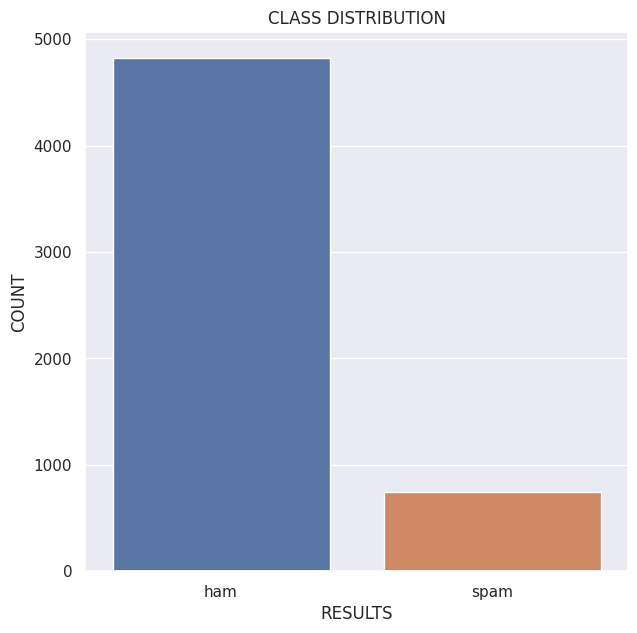

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='v1', data=df1)
plt.title('CLASS DISTRIBUTION')
plt.xlabel('RESULTS')
plt.ylabel('COUNT')
plt.show()

In [ ]:
ham = df1[df1['v1']=='ham']
spam = df1[df1['v1']=='spam']

In [ ]:
print(ham.shape)

(4825, 2)


In [ ]:
print(spam.shape)

(747, 2)


In [ ]:
df2 = ham.append(spam, ignore_index=True)

<ipython-input-20-d295a8d0255e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = ham.append(spam, ignore_index=True)


In [ ]:
df2.shape

(5572, 2)

In [ ]:
df2.head(7)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...
5,ham,As per your request 'Melle Melle (Oru Minnamin...
6,ham,I'm gonna be home soon and i don't want to tal...


In [ ]:
df2.tail(7)

,v1,v2
5565,spam,You are awarded a SiPix Digital Camera! call 0...
5566,spam,PRIVATE! Your 2003 Account Statement for shows...
5567,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5568,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5569,spam,Had your contract mobile 11 Mnths? Latest Moto...
5570,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5571,spam,This is the 2nd time we have tried 2 contact u...


In [ ]:
df2['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
poshtee = PorterStemmer()
brutus = []

for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]',' ', df2['v2'][i])
    review = review.lower()
    review = review.split()
    review = [poshtee.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    brutus.append(review)

In [ ]:
brutus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back amp pack

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvt = CountVectorizer()
x = cvt.fit_transform(brutus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(5572, 6221)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df2.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df1['v1'], test_size=0.4, random_state=3)

From here various classification models are being used to find out the model with the highest accuracy  

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
LR= LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
p_L= LR.predict(x_test)

In [ ]:
print('Accuracy of Logistic Regression : ', accuracy_score(y_test, p_L))

Accuracy of Logistic Regression :  0.8497083894122925


In [ ]:
classifyLR = classification_report(y_test,p_L)

In [ ]:
print("Classification Report of Logistic Regression: ", classifyLR)

Classification Report of Logistic Regression:                precision    recall  f1-score   support

         ham       0.86      0.99      0.92      1910
        spam       0.10      0.01      0.01       319

    accuracy                           0.85      2229
   macro avg       0.48      0.50      0.47      2229
weighted avg       0.75      0.85      0.79      2229



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_dtc=dtc.predict(x_test)
print('Accuracy using Decision Tree Classifier : ', accuracy_score(y_test, pred_dtc))

Accuracy using Decision Tree Classifier :  0.8362494392104083


In [ ]:
classifyDTC=classification_report(y_test,pred_dtc)
print("Classification Report using Decision Tree Classifier: ", classifyDTC)

Classification Report using Decision Tree Classifier:                precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1910
        spam       0.12      0.02      0.04       319

    accuracy                           0.84      2229
   macro avg       0.49      0.50      0.47      2229
weighted avg       0.75      0.84      0.79      2229



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, random_state = 3)
rfc.fit(x_train, y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy using Random Forest Classifier: ',accuracy_score(y_test,pred_rfc))

Accuracy using Random Forest Classifier:  0.8366980708838044


In [ ]:
classifyRFC=classification_report(y_test,pred_rfc)
print("Classification Report using RandomForest Classifier: ", classifyRFC)

Classification Report using RandomForest Classifier:                precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1910
        spam       0.11      0.02      0.03       319

    accuracy                           0.84      2229
   macro avg       0.48      0.50      0.47      2229
weighted avg       0.75      0.84      0.79      2229



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
inb = MultinomialNB().fit(x_train, y_train)

In [ ]:
inb.fit(x_train, y_train)
pred_inb=inb.predict(x_test)
print('Accuracy using Naive Bayes Classifier: ',accuracy_score(y_test,pred_inb))

Accuracy using Naive Bayes Classifier:  0.8272768057424854


In [ ]:
classifyINB=classification_report(y_test,pred_inb)
print("Classification Report using RandomForest Classifier: ", classifyINB)

Classification Report using RandomForest Classifier:                precision    recall  f1-score   support

         ham       0.86      0.96      0.90      1910
        spam       0.18      0.06      0.09       319

    accuracy                           0.83      2229
   macro avg       0.52      0.51      0.50      2229
weighted avg       0.76      0.83      0.79      2229



So from the above conditions we can conclude that the RandomForestClassifier is giving the highest accuracy of 86.6%